<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 7.1: Decision Trees

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find and answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.6895
    - **ROC AUC**  = 0.5690
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first stp is to idenfy the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ then **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, labour and iteractive processes. It is part of the process to repeat, review and change when finding a dead-end.

## Scenario: Predicting Heart Disease
Heart disease is one of the main causes of death worldwide, so this is a good start to use data science for good.

To learn how to prevent heart disease is necessary to know how to reliably detect it first.

There is a dataset from a study of heart disease that has been open to the public for many years. The study collects various measurements on patient health and cardiovascular statistics, and of course makes patient identities anonymous.

Data is courtesy of **Yeh, I-Cheng** via the **UCI Machine Learning** repository:
- Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008, doi:10.1016/j.eswa.2008.07.018.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.
1. What couses a heart desise
2. How can we predict the risks fo s heart desis

## Actual Question
Choose the **one** question that should be answered.

# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh 
        Department of Information Management 
        Chung-Hua University, 
        Hsin Chu, Taiwan 30067, R.O.C. 

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper: 

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [418]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import  cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, mean_absolute_error,accuracy_score, classification_report,roc_curve, roc_auc_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [28]:
df = pd.read_csv("../../DATA/heart.csv")

In [393]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [30]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.columns

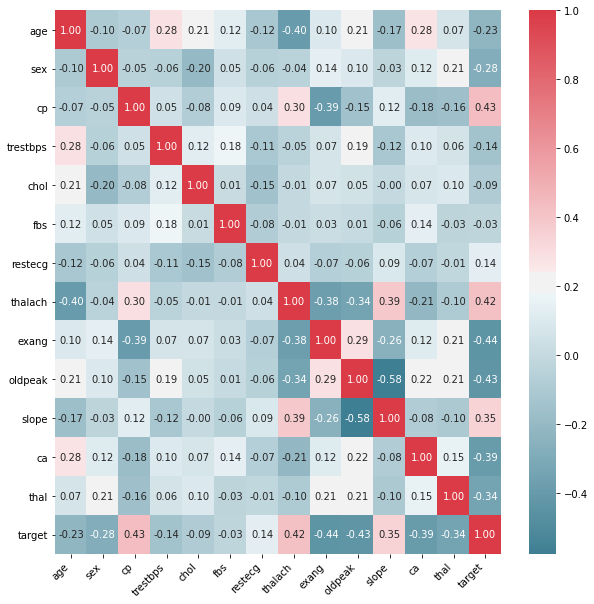

In [31]:
fig, ax = plt.subplots(figsize=(10, 10))
colum_names=df.columns
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df.corr(), cmap=colormap, annot=True, fmt=".2f")
ax.set_xticklabels(
    df.columns,
    rotation=45,
    horizontalalignment='right'
);
ax.set_yticklabels(colum_names);
plt.show()

In [32]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)



age         13.5
sex          1.0
cp           2.0
trestbps    20.0
chol        63.5
fbs          0.0
restecg      1.0
thalach     32.5
exang        1.0
oldpeak      1.6
slope        1.0
ca           1.0
thal         1.0
target       1.0
dtype: float64


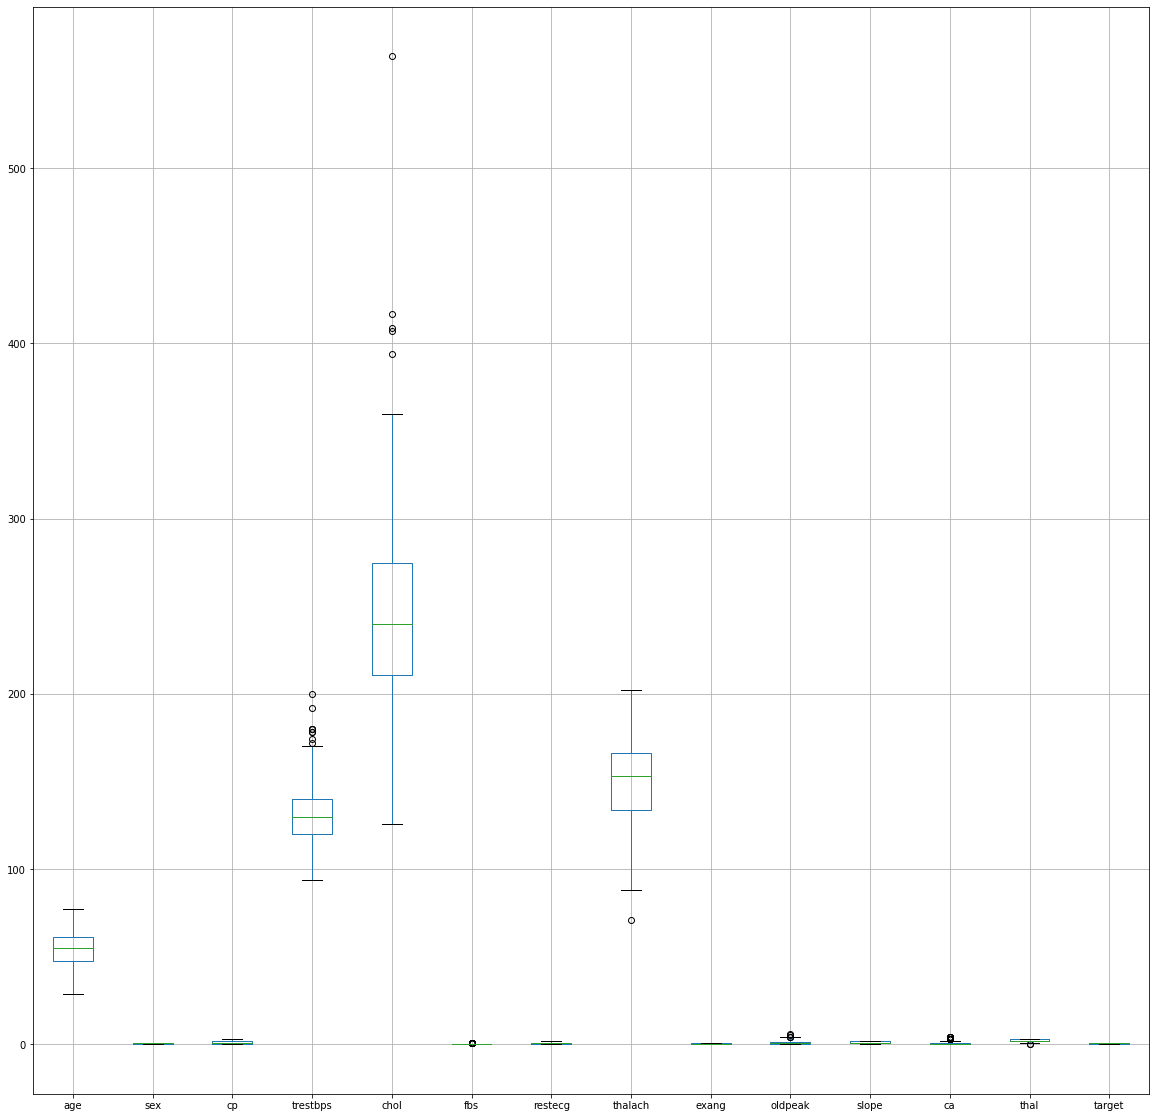

In [33]:
plt.figure(figsize=[20,20])
columns = np.array(df.columns)
boxplot = df.boxplot(column=list(df.columns) )


OUTLIERS TREATMENT

In [ ]:
q1 = df.quantile(0.25) #first quartile value
q3 = df.quantile(0.75) # third quartile value
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range

In [ ]:
#df.loc[df['chol'] >540, ['chol']] 

In [ ]:
#df.loc[df['chol'] >540, ['chol']]  = df['chol'].median()

In [ ]:
#df.loc[df['thalach'] <80, ['thalach']] 

In [ ]:
#df.loc[df['thalach'] <80, ['thalach']]  = df['thalach'].median()

In [ ]:
#df['chol'].skew()

In [ ]:
#print(df['chol'].quantile(0.10))
#print(df['chol'].quantile(0.97))

In [ ]:
#df["chol"] = np.where(df["chol"] >340.94, 340.94,df['chol'])
#print(df['chol'].skew())

In [ ]:
#df['thalach'].skew()

In [ ]:
#print(df['thalach'].quantile(0.10))
#print(df['thalach'].quantile(0.90))

In [ ]:
#df["thalach"] = np.where(df["thalach"] <116.0, 116.0,df['thalach'])
#df["thalach"] = np.where(df["thalach"] >176.60000000000002, 176.60000000000002,df['thalach'])
#print(df['thalach'].skew())

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

(array([149.,  50.,  40.,  24.,  20.,  11.,   6.,   1.,   0.,   2.]),
 array([0.  , 0.62, 1.24, 1.86, 2.48, 3.1 , 3.72, 4.34, 4.96, 5.58, 6.2 ]),
 <a list of 10 Patch objects>)

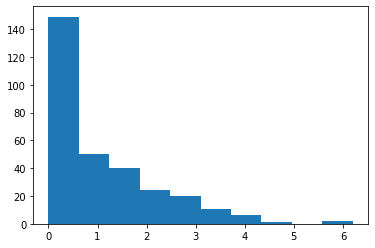

In [223]:
plt.hist(df['oldpeak'])

(array([ 1.,  0.,  6.,  5.,  7., 26., 19., 19., 12., 25., 32., 28., 44.,
        19., 19., 24.,  7.,  7.,  1.,  2.]),
 array([29. , 31.4, 33.8, 36.2, 38.6, 41. , 43.4, 45.8, 48.2, 50.6, 53. ,
        55.4, 57.8, 60.2, 62.6, 65. , 67.4, 69.8, 72.2, 74.6, 77. ]),
 <a list of 20 Patch objects>)

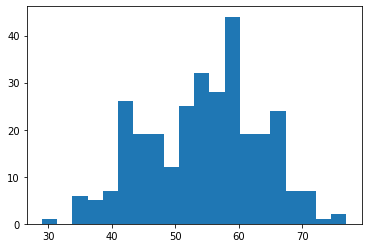

In [224]:
plt.hist(df['age'], bins=20)


In [ ]:
plt.hist(df['chol'], bins=20)

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

In [ ]:
df.head(1)

In [34]:
X = df[df.columns.difference(['target'])]
X

,age,ca,chol,cp,exang,fbs,oldpeak,restecg,sex,slope,thal,thalach,trestbps
0,63,0,233,3,0,1,2.3,0,1,0,1,150,145
1,37,0,250,2,0,0,3.5,1,1,0,2,187,130
2,41,0,204,1,0,0,1.4,0,0,2,2,172,130
3,56,0,236,1,0,0,0.8,1,1,2,2,178,120
4,57,0,354,0,1,0,0.6,1,0,2,2,163,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,241,0,1,0,0.2,1,0,1,3,123,140
299,45,0,264,3,0,0,1.2,1,1,1,3,132,110
300,68,2,193,0,0,1,3.4,1,1,1,3,141,144
301,57,1,131,0,1,0,1.2,1,1,1,3,115,130


In [35]:
y= df['target']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

# Decision Tree

In [ ]:
tree_para = {'criterion':['gini','entropy'],'max_depth':[2,3,4,5,6,7,8,9,10]}
clf = GridSearchCV(DecisionTreeClassifier(random_state=7), tree_para, cv=10)


# Step 9: Fit the Model

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
clf.best_params_

# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [ ]:
y_pred = clf.predict(X_test)
y_pred

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(20,16))
_ = tree.plot_tree(clf.best_estimator_)

In [ ]:
X_test.head(8)

In [ ]:
df[119:120]

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
preds = clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, preds)
roc_auc= auc(fpr,tpr)

In [ ]:
print(roc_auc)

Target to bit
Accuracy = 0.6895
ROC AUC = 0.5690
Try to achieve better results!

# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

# Random Forest (Baggins)

In [162]:
from sklearn.ensemble import RandomForestClassifier

In [163]:
tree_para = {'criterion':['gini'],'max_depth':[2,4,6], 'n_estimators':(10, 100, 400)}
clf_RF = GridSearchCV(RandomForestClassifier(random_state=7), tree_para, cv=5)

In [164]:
%%time
clf_RF.fit(X_train, y_train)

CPU times: user 13.7 s, sys: 375 ms, total: 14.1 s
Wall time: 17.2 s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=7,
                                   

In [165]:
clf_RF.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

In [166]:
y_pred_RF = clf_RF.predict(X_test)

In [167]:
accuracy_score(y_test, y_pred_RF)

0.87

In [168]:
confusion_matrix(y_test, y_pred_RF)

array([[36,  6],
       [ 7, 51]])

In [169]:
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        42
           1       0.89      0.88      0.89        58

    accuracy                           0.87       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.87      0.87      0.87       100



In [170]:
#Which feature is the most important
clf_RF.best_estimator_.feature_importances_

array([0.02908944, 0.19292474, 0.01809797, 0.20252174, 0.11562253,
       0.00300251, 0.0991831 , 0.00070682, 0.03476779, 0.05583056,
       0.16838269, 0.07721714, 0.00265298])

In [171]:
Feaureslist = np.array(X_test.columns)
Feaureslist

array(['age', 'ca', 'chol', 'cp', 'exang', 'fbs', 'oldpeak', 'restecg',
       'sex', 'slope', 'thal', 'thalach', 'trestbps'], dtype=object)

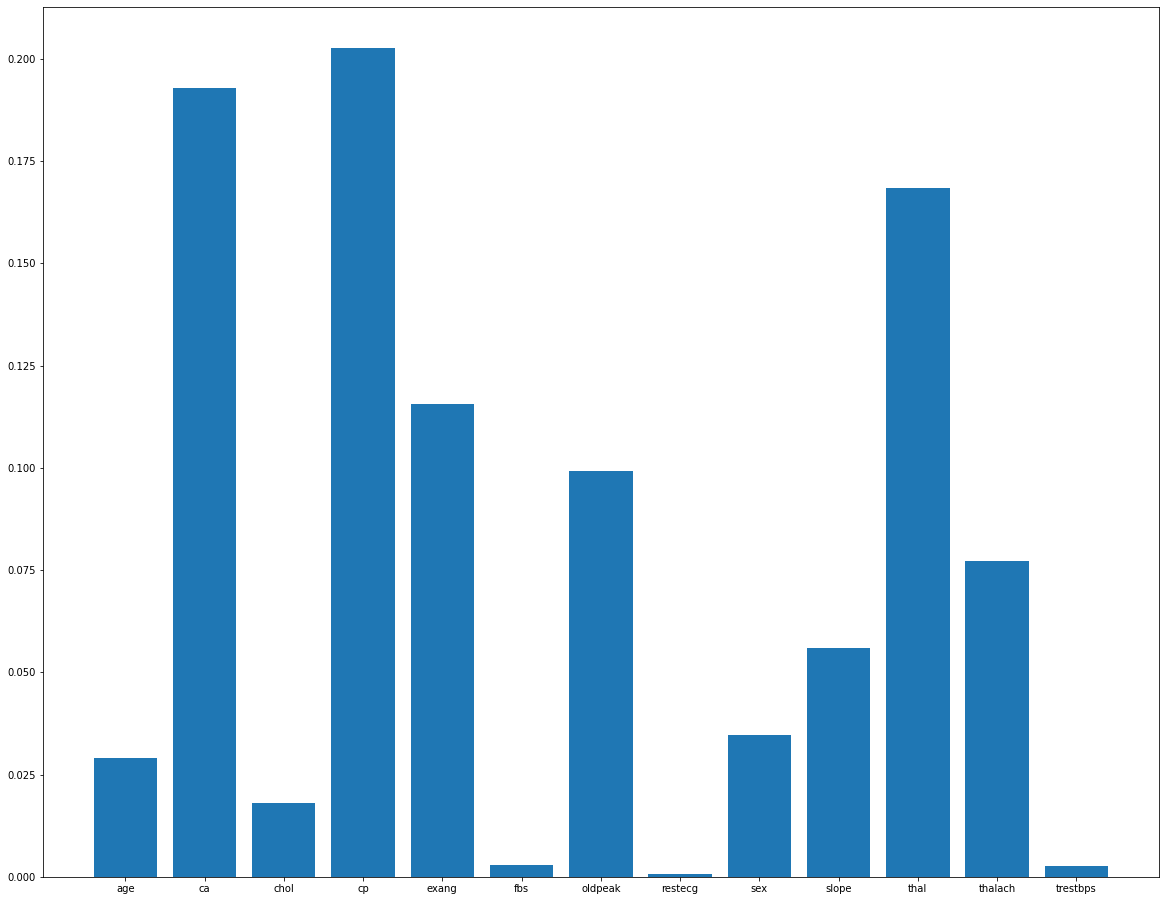

In [172]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,16))
plt.bar(range(len(clf_RF.best_estimator_.feature_importances_)), clf_RF.best_estimator_.feature_importances_)
plt.xticks(np.arange(13),Feaureslist)
plt.show()

In [ ]:
#The prob of a sample to belong to class 0/1
clf_RF.predict_proba(X_test)

In [228]:
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        42
           1       0.89      0.88      0.89        58

    accuracy                           0.87       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.87      0.87      0.87       100



# Ensamble (Boosting)

In [443]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import itertools

param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1, 2, 3, 10]
             }
LR_param_grid = itertools.product([0, 1], repeat = 2)



tree_para = {'criterion':['gini','entropy'],'max_depth':[2,3,4,5,6,7,8,9,10]}

DTC = DecisionTreeClassifier(random_state = 42, max_features = "auto", class_weight = "balanced",max_depth = None)
#DTC = DecisionTreeClassifier( tree_para)
LRC = LogisticRegression(n_jobs=-1)


ABC = AdaBoostClassifier(base_estimator = DTC)

# run grid search
grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid)


In [444]:
grid_search_ABC.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                class_weight='balanced',
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features='auto',
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_sample

In [445]:
grid_search_ABC.score(X_test,y_test)

0.69

In [446]:
y_abc_pred = grid_search_ABC.predict(X_test)

In [432]:
accuracy_score(y_test,y_abc_pred )

0.77

In [212]:
grid_search_ABC.best_estimator_.feature_importances_

array([0.09803127, 0.13335149, 0.0898319 , 0.20099509, 0.05140275,
       0.01994148, 0.09338669, 0.00587982, 0.0426086 , 0.0544939 ,
       0.04108758, 0.11415948, 0.05482996])

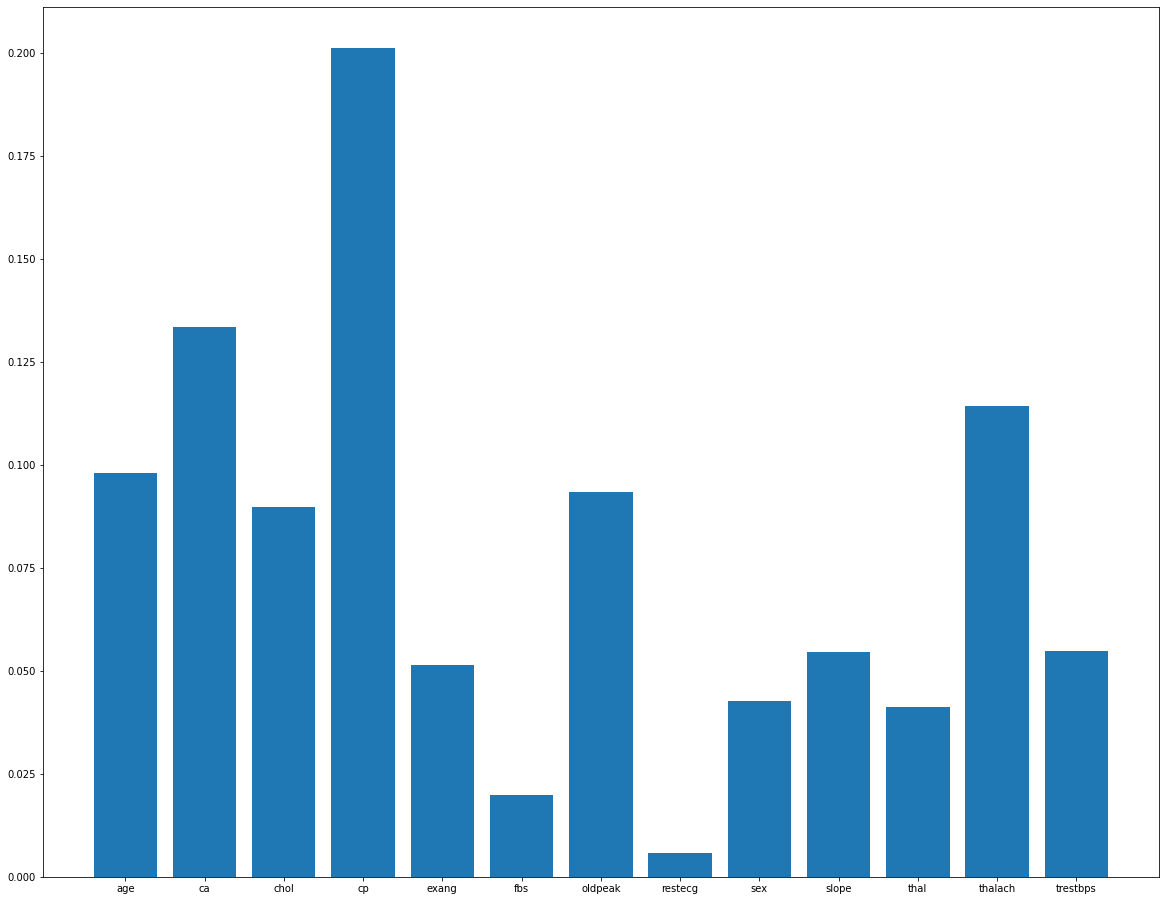

In [213]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,16))
plt.bar(range(len(grid_search_ABC.best_estimator_.feature_importances_)), grid_search_ABC.best_estimator_.feature_importances_)
plt.xticks(np.arange(13),Feaureslist)
plt.show()

In [214]:
print(classification_report(y_test,y_abc_pred))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78        42
           1       0.84      0.83      0.83        58

    accuracy                           0.81       100
   macro avg       0.80      0.81      0.81       100
weighted avg       0.81      0.81      0.81       100



In [222]:
confusion_matrix(y_test, y_abc_pred)

array([[33,  9],
       [10, 48]])

# Logistic Regression

In [131]:
from sklearn.linear_model import LogisticRegression

In [ ]:
##########


In [132]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logregGS=GridSearchCV(logreg,grid,cv=10)


In [133]:
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.exceptions import FitFailedWarning
@ignore_warnings(category=(ConvergenceWarning,FitFailedWarning))
def my_function():
    # Code that triggers the warning
    logregGS.fit(X_train,y_train)
    print("tuned hpyerparameters :(best parameters) ",logregGS.best_params_)
    print("accuracy :",logregGS.best_score_)

    
my_function()   
    

    


tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l2'}
accuracy : 0.8761904761904763


In [137]:
logregGS.best_estimator_.coef_.reshape(13,)

array([ 2.40618133e-02, -1.39779761e+00, -6.59957451e-04,  9.08162157e-01,
       -8.27077669e-01,  1.95221960e-02, -4.78016682e-01,  4.88439933e-01,
       -9.98165817e-01,  7.89022272e-01, -1.26226307e+00,  1.76437205e-02,
       -6.55112621e-03])

In [139]:
Feaureslist = X_test.columns

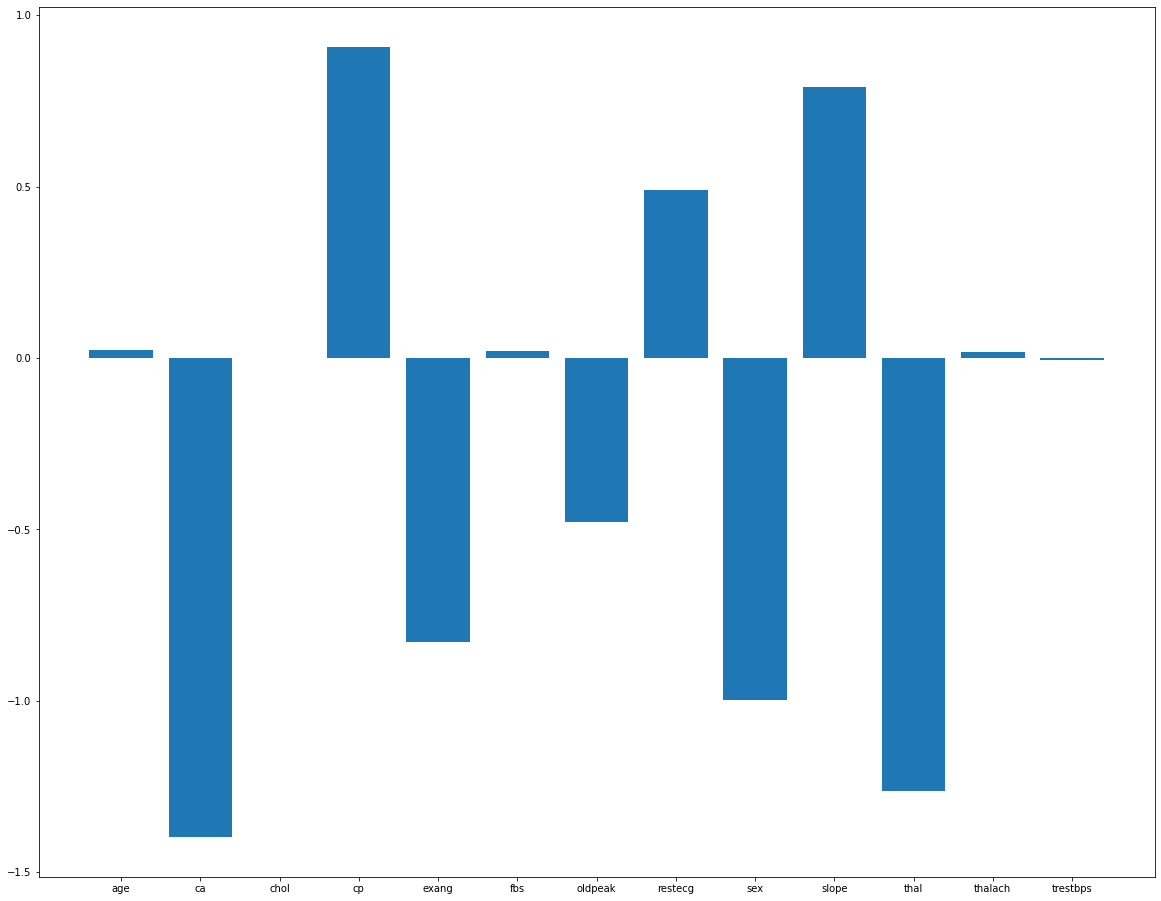

In [140]:
plt.figure(figsize=(20,16))
plt.bar(range(len(logregGS.best_estimator_.coef_.reshape(13,))), logregGS.best_estimator_.coef_.reshape(13,))
plt.xticks(np.arange(13),Feaureslist)
plt.show()

In [215]:
y_pred_LR = logregGS.predict(X_test)

In [216]:
accuracy_score(y_test, y_pred_LR)

0.8

In [217]:
logregGS.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0])

In [218]:
logregGS.predict_proba(X_test)

array([[8.62670285e-01, 1.37329715e-01],
       [1.79928656e-01, 8.20071344e-01],
       [2.79956046e-01, 7.20043954e-01],
       [9.91161709e-01, 8.83829054e-03],
       [7.17063838e-02, 9.28293616e-01],
       [5.18616771e-02, 9.48138323e-01],
       [4.68959093e-01, 5.31040907e-01],
       [9.99212282e-01, 7.87718249e-04],
       [9.96186285e-01, 3.81371498e-03],
       [5.98305135e-01, 4.01694865e-01],
       [1.50921433e-01, 8.49078567e-01],
       [8.13330814e-01, 1.86669186e-01],
       [6.88618430e-02, 9.31138157e-01],
       [9.75238275e-01, 2.47617254e-02],
       [2.33889344e-02, 9.76611066e-01],
       [4.75769958e-02, 9.52423004e-01],
       [3.31749641e-02, 9.66825036e-01],
       [9.61911183e-01, 3.80888169e-02],
       [9.97338682e-01, 2.66131751e-03],
       [9.82995667e-01, 1.70043332e-02],
       [1.95349802e-01, 8.04650198e-01],
       [9.86188495e-01, 1.38115046e-02],
       [6.98108036e-01, 3.01891964e-01],
       [3.21880337e-01, 6.78119663e-01],
       [1.486042

In [219]:
confusion_matrix(y_test, y_pred_LR)

array([[33,  9],
       [11, 47]])

In [220]:
accuracy_score(y_test, y_pred_LR)

0.8

In [221]:
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77        42
           1       0.84      0.81      0.82        58

    accuracy                           0.80       100
   macro avg       0.79      0.80      0.80       100
weighted avg       0.80      0.80      0.80       100



In [78]:
df.shape

(303, 14)

# SVM

In [124]:
from sklearn import svm

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [231]:
tuned_parameters = [{'kernel': ['rbf'], 
                     'C': [1, 10, 100]},
                    {'kernel': ['linear'], 'C': [1, 10, 100]},
                    {'kernel':['poly']},
                    {'kernel': ['sigmoid']},
                    {'kernel': ['gaussian']}]


svmGS=GridSearchCV(svm.SVC(),tuned_parameters,cv=5)

In [232]:
%%time
svmGS.fit(X_train,y_train)

/Users/doron/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: 'gaussian' is not in list

  FitFailedWarning)
/Users/doron/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: 'gaussian' is not in list

  FitFailedWarning)
/Users/doron/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: 'gaussian' is not in list

  FitFailedWarning)
/Users/doron/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit faile

CPU times: user 41.5 s, sys: 369 ms, total: 41.9 s
Wall time: 44 s


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100], 'kernel': ['rbf']},
                         {'C': [1, 10, 100], 'kernel': ['linear']},
                         {'kernel': ['poly']}, {'kernel': ['sigmoid']},
                         {'kernel': ['gaussian']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [73]:
svmGS.score(X_train, y_train)

0.9014778325123153

In [233]:
y_pred_svm = svmGS.predict(X_test)

In [234]:
accuracy_score(y_pred_svm,y_test)

0.82

In [57]:
svmGS.best_estimator_

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [235]:
svmGS.best_estimator_.coef_

array([[ 0.03221731, -1.54488712, -0.00321074,  0.95385316, -0.61732957,
         0.00949534, -0.34592127,  0.33886337, -1.30488162,  0.77224179,
        -1.21394328,  0.01768171, -0.0153686 ]])

In [236]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79        42
           1       0.86      0.83      0.84        58

    accuracy                           0.82       100
   macro avg       0.81      0.82      0.82       100
weighted avg       0.82      0.82      0.82       100



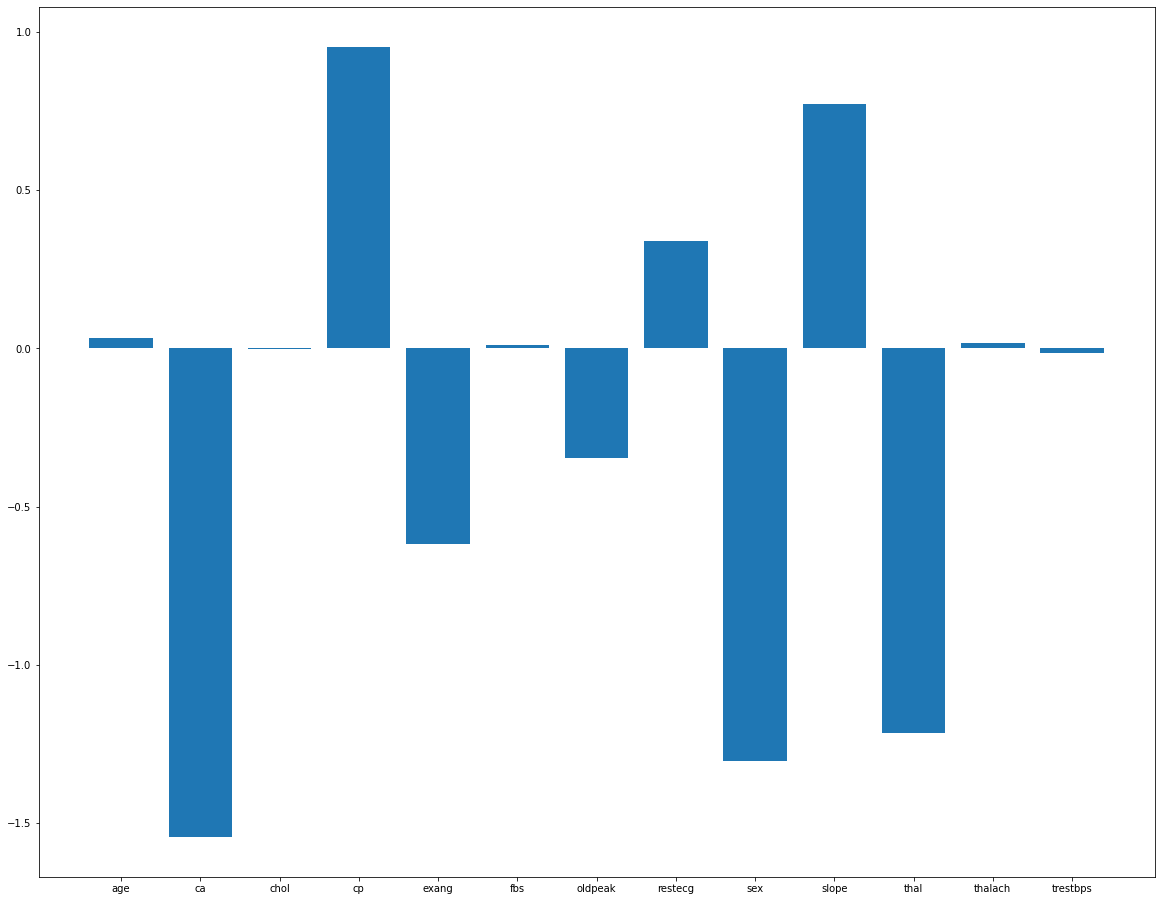

In [237]:
plt.figure(figsize=(20,16))
plt.bar(range(len(svmGS.best_estimator_.coef_.reshape(13,))), svmGS.best_estimator_.coef_.reshape(13,))
plt.xticks(np.arange(13),Feaureslist)
plt.show()

In [243]:
svmGS.best_estimator_

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [244]:
best_svc = svm.SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [245]:
best_svc.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [322]:
best_svc.support_vectors_.shape

(70, 13)

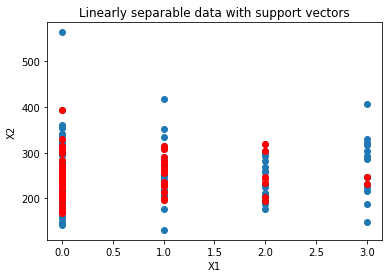

In [368]:
# support_vectors = best_svc.support_vectors_

# Visualize support vectors
plt.scatter(X_train.iloc[:,0], X_train.iloc[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [327]:
X_train.shape

(203, 13)

In [358]:
best_svc.support_vectors_.shape

(70, 13)

In [344]:
best_svc.support_.shape

(70,)

# Result Table

In [837]:
 Result_table = pd.DataFrame( index=['Accuracy','Recall','Precision','Roc Auc']\
                             , columns=['DT','RFC','LR'])

In [942]:
#Result table



Result_table.loc['Accuracy','DT']=accuracy_score(y_test, y_pred)
Result_table.loc['Recall','DT']=recall_score(y_test, y_pred)
Result_table.loc['Precision','DT']=precision_score(y_test, y_pred)
Result_table.loc['Roc Auc','DT']=roc_auc_score(y_test, y_pred)
Result_table.loc['Accuracy','RFC']=accuracy_score(y_test, y_pred_RF)
Result_table.loc['Recall','RFC']=recall_score(y_test, y_pred_RF)
Result_table.loc['Precision','RFC']=precision_score(y_test, y_pred_RF)
Result_table.loc['Roc Auc','RFC']=roc_auc_score(y_test, y_pred_RF)
Result_table.loc['Accuracy','LR']=accuracy_score(y_test, y_pred_LR)
Result_table.loc['Recall','LR']=recall_score(y_test, y_pred_LR)
Result_table.loc['Precision','LR']=precision_score(y_test, y_pred_LR)
Result_table.loc['Roc Auc','LR']=roc_auc_score(y_test, y_pred_LR)
Result_table

,DT,RFC,LR
Accuracy,0.87,0.87,0.8
Recall,0.87931,0.87931,0.810345
Precision,0.894737,0.894737,0.839286
Roc Auc,0.868227,0.868227,0.79803


In [242]:
roc_auc_score(y_test, y_pred_LR)

0.7980295566502462

>



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



